## NEW CAPILAB_DATASET.PY

In [1]:
import numpy as np
import tensorflow as tf
from scipy.signal import lfilter, butter, filtfilt
from scipy.io import loadmat

def load_target(fname:str, target:list = None):
    label_keys = {'no':0, 'ball':1, 'box':2, 'pen':3}

    path = fname
    
    info = loadmat(path)
    
    ball_data = np.vstack([
        np.moveaxis(info['ball1'], 2, 0),
        np.moveaxis(info['ball2'], 2, 0),
        np.moveaxis(info['ball3'], 2, 0),
        np.moveaxis(info['ball4'], 2, 0),
        np.moveaxis(info['ball5'], 2, 0)
    ])
    ball_label = np.ones((ball_data.shape[0], 1)) * label_keys['ball']
    
    box_data = np.vstack([
        np.moveaxis(info['box1'], 2, 0),
        np.moveaxis(info['box2'], 2, 0),
        np.moveaxis(info['box3'], 2, 0),
        np.moveaxis(info['box4'], 2, 0),
        np.moveaxis(info['box5'], 2, 0)
    ])
    box_label = np.ones((box_data.shape[0], 1)) * label_keys['box']
    
    pen_data = np.vstack([
        np.moveaxis(info['pen1'], 2, 0),
        np.moveaxis(info['pen2'], 2, 0),
        np.moveaxis(info['pen3'], 2, 0),
        np.moveaxis(info['pen4'], 2, 0),
        np.moveaxis(info['pen5'], 2, 0)
    ])
    pen_label = np.ones((pen_data.shape[0], 1)) * label_keys['pen']
    
    no_data = np.vstack([
        np.moveaxis(info['no1'], 2, 0),
        np.moveaxis(info['no2'], 2, 0),
        np.moveaxis(info['no3'], 2, 0),
        np.moveaxis(info['no4'], 2, 0),
        np.moveaxis(info['no5'], 2, 0)
    ])
    no_label = np.ones((no_data.shape[0], 1)) * label_keys['no']
    # data = np.moveaxis(data, 2, 0)
    
    data = np.vstack([ball_data, box_data, pen_data, no_data])
    label = np.vstack([ball_label, box_label, pen_label, no_label])
    
    nbr_class = len(np.unique(label))
    label = tf.keras.utils.to_categorical(label,num_classes = nbr_class)
    
    return data, label

2023-03-07 14:34:49.440293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 14:34:49.595135: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-07 14:34:50.240366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/lib/:/home/capiadmin/anaconda3/envs/ray/lib/:/home/capiadmin/anaconda3/envs/ray/lib/
2023-03-07 14:34:50.240488: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'l

(600, 19, 1000) (600, 4)
(19, 1000)
[0. 0. 1. 0.]


<Figure size 1440x576 with 0 Axes>

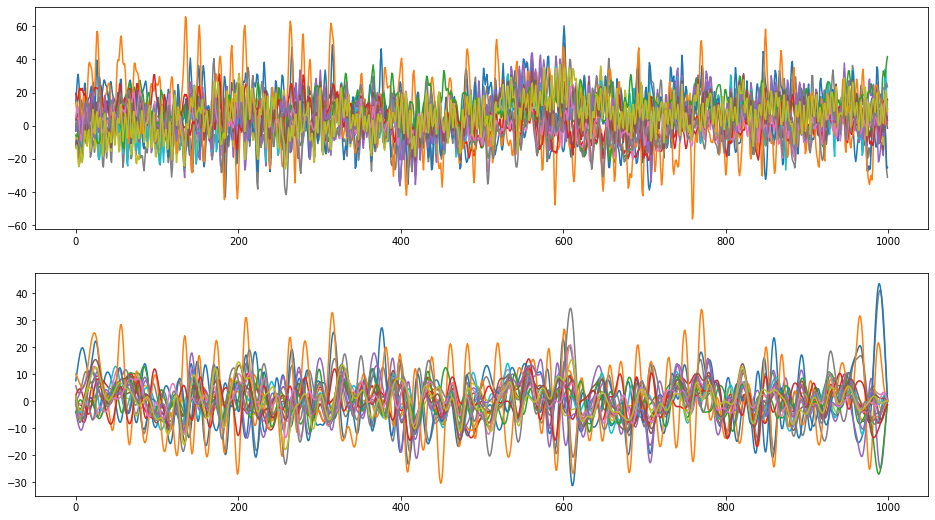

In [9]:
def butterworth_bpf(data, lowcut, highcut, fs, order = 4):
    nyquist = fs * 0.5
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype = 'band', output = 'ba', analog = False)
    return filtfilt(b, a, data, axis = 1)

fname = 'Datasets/Takahashi_JulyData'
X, y = load_target(fname)
print(X.shape, y.shape)

#filter
x = X[10,:,:]
print(x.shape)
xfilt = butterworth_bpf(x, 2, 30, 500)


import matplotlib.pyplot as plt
plt.figure(figsize = (20, 8))
target = 200
print(y[target])
fig, axs = plt.subplots(2,1, figsize=(16,9))
axs[0].plot(x.T, label = 'raw')
axs[1].plot(xfilt.T, label = 'raw')
plt.show()
